In [254]:
#library for data analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

#convert address to longitude and latitude
import geopy
from geopy.geocoders import Nominatim

#library for graphing
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#associated plotting modules
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly.offline import iplot, plot, init_notebook_mode

#library for maps
import folium
from folium.plugins import HeatMap

In [255]:
#import datasets and explore
df_zillow = pd.read_csv("Zip_Zhvi_2bedroom.csv")
df_zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798600.0,798800.0,801500.0,804600.0,814900.0,828300.0,835700.0,849300.0,858100.0,854000.0,834800.0,821700.0,830300.0,853700.0,868300.0,875200.0,882200.0,892400.0,905000.0,924000.0,934400.0,932100.0,927500.0,923600.0,907900.0,890900.0,883400.0,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,167200.0,166900.0,166900.0,168000.0,170100.0,171700.0,173000.0,17460

In [256]:
df_zillow.shape

(8946, 262)

In [257]:
df_bnb = pd.read_csv("listings.csv.gz")
df_bnb.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,-The security and comfort of all our guests is...,NaN,NaN,https://a0.muscache.com/im/pictures/3949d073-a...,NaN,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/8674565a-7...,https://a0.muscache.com/im/pictures/8674565a-7...,Gravesend,6.0,6.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn , NY, United States",Brooklyn,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",US,United States,40.64749,-73.97237,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",NaN,$149.00,$299.00,$999.00,$100.00,$25.00,1,$35.00,1,730,1,1,730,730,1.0,730.0,3 weeks ago,t,30,60,90,365,2019-07-09,9,2,2015-12-04,2018-10-19,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,87%,NaN,f,https://a0.muscache.com/im/users/2845/profile_...,https://a0.muscache.com/im/users/2845/profile_...,Midtown,5.0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"New York, NY, United States",M

In [258]:
#focus on target city
zillow_ny = df_zillow[df_zillow.City == 'New York']
zillow_ny.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,798600.0,798800.0,801500.0,804600.0,814900.0,828300.0,835700.0,849300.0,858100.0,854000.0,834800.0,821700.0,830300.0,853700.0,868300.0,875200.0,882200.0,892400.0,905000.0,924000.0,934400.0,932100.0,927500.0,923600.0,907900.0,890900.0,883400.0,896100.0,923900.0,952900.0,964600.0,972500.0,973800.0,973400.0,966500.0,966800.0,967100.0,974800.0,976800.0,976100.0,973700.0,974500.0,973200.0,966400.0,950400.0,933300.0,920900.0,909400.0,891400.0,873300.0,858800.0,850200.0,842800.0,834000.0,828800.0,821400.0,813900.0,813300.0,821500.0,831700.0,845100.0,854500.0,858900.0,859200.0,863500.0,876000.0,886100.0,890000.0,894200.0,901800.0,909500.0,913300.0,907400.0,900000.0,897700.0,896300.0,892300.0,890400.0,888600.0,891700.0,899500.0,904400.0,908200.0,914000.0,915100.0,912300.0,914000.0,921100.0,923300.0,917300.0,915000.0,922800.0,929100.0,937700.0,955700.0,974200.0,995500.0,1019500.0,1035100.0,1054900.0,1079900,1092600,1103500,1118800,1139300,1154600,1144100,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [259]:
#merge the two tables using 'RegionName' from Zillow and 'zipcode' from AirBnB

#unify naming convention and data types
zillow_ny = zillow_ny.rename({'RegionName':'zipcode'}, axis=1)
zillow_ny.zipcode = zillow_ny.zipcode.astype('str')

In [260]:
zillow_bnb = pd.merge(zillow_ny, df_bnb, how = 'inner', on = 'zipcode')
zillow_bnb.shape

(7106, 367)

In [261]:
#Narrow our results down to AirBnB rentals with two bedrooms
zillow_bnb.bedrooms = zillow_bnb.bedrooms.astype('str')
zillow_bnb = zillow_bnb[zillow_bnb.bedrooms == '2.0']
zillow_bnb.shape

(1093, 367)

In [262]:
#see when the AirBnB data was pulled
print(set(bnb_ny.last_scraped))

{'2019-07-08', '2019-07-09'}


#### Assume latest housing information from 2017-06 as the median price 

In [263]:
#examine the percentage of missing values in each column
missing = zillow_bnb.isna().mean().round(4) * 100
missing

RegionID                                          0.00
zipcode                                           0.00
City                                              0.00
State                                             0.00
Metro                                             0.00
CountyName                                        0.00
SizeRank                                          0.00
1996-04                                          98.72
1996-05                                          98.72
1996-06                                          98.72
1996-07                                          98.72
1996-08                                          98.72
1996-09                                          98.72
1996-10                                          98.72
1996-11                                          98.72
1996-12                                          98.72
1997-01                                          98.72
1997-02                                          98.72
1997-03   

### Given the high percentage of missing data in both datasets, we will choose which columns to focus on

In [264]:
cols = ["zipcode", 
        "CountyName", 
        "SizeRank", 
        "2017-06", 
        "id", 
        "bedrooms",
        "neighbourhood_cleansed",
        "neighbourhood_group_cleansed",
        "latitude", 
        "longitude",
        "property_type", 
        "price", 
        "weekly_price", 
        "monthly_price"]
zillow_bnb = zillow_bnb[cols]
zillow_bnb.head()

,zipcode,CountyName,SizeRank,2017-06,id,bedrooms,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,price,weekly_price,monthly_price
8,10025,New York,1,1431000,145994,2.0,Upper West Side,Manhattan,40.79264,-73.97294,Apartment,$95.00,NaN,NaN
9,10025,New York,1,1431000,148825,2.0,Upper West Side,Manhattan,40.79765,-73.96245,Apartment,$165.00,"$1,100.00",NaN
11,10025,New York,1,1431000,166006,2.0,Upper West Side,Manhattan,40.80006,-73.96049,Apartment,$250.00,"$1,100.00","$4,400.00"
12,10025,New York,1,1431000,174966,2.0,Upper West Side,Manhattan,40.77350,-73.98697,Condominium,"$2,000.00",NaN,"$15,000.00"
14,10025,New York,1,1431000,215907,2.0,Upper West Side,Manhattan,40.79816,-73.96190,Apartment,$300.00,NaN,NaN


#### After dealing with missing values, let us check for outliers

In [265]:
#Changing datatypes to perform analyses
zillow_bnb['bedrooms'] = pd.to_numeric(zillow_bnb['bedrooms'], downcast='integer')

def change_price(price):
    price = str(price)
    return float(''.join(i for i in price if i not in ['$',',']))

for i in ['price', 'weekly_price', 'monthly_price']:
    zillow_bnb[i] = zillow_bnb[i].apply(change_price)

Text(0, 0.5, 'Daily Listing Price')

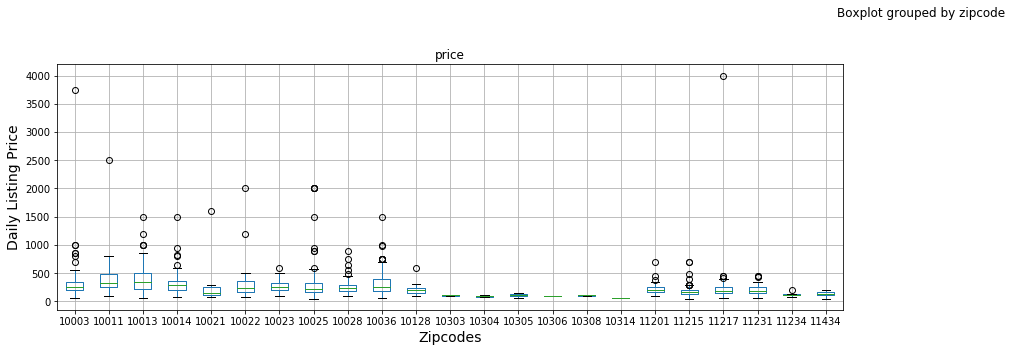

In [266]:
#check for outliers in the daily price column
fig_out = plt.figure(figsize=(30,10))
ax1 = fig_out.add_subplot(221)
zillow_bnb.boxplot(column='price', by='zipcode',ax=ax1)
ax1.set_xlabel("Zipcodes", fontsize = 14)
ax1.set_ylabel("Daily Listing Price", fontsize = 14)

Text(0, 0.5, 'Monthly Listing Price')

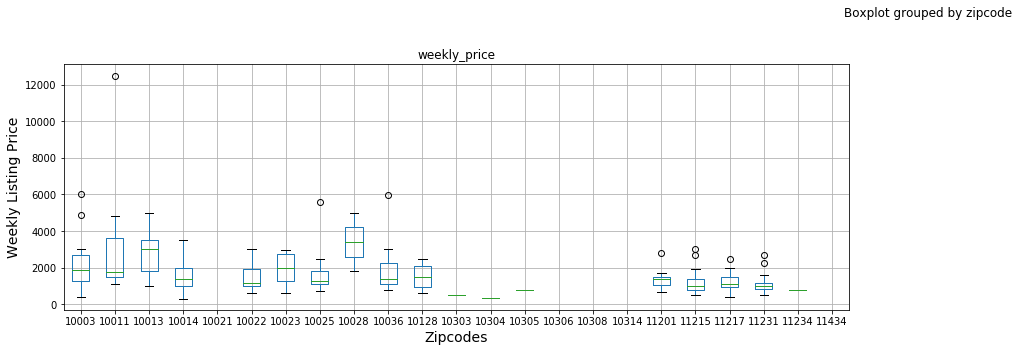

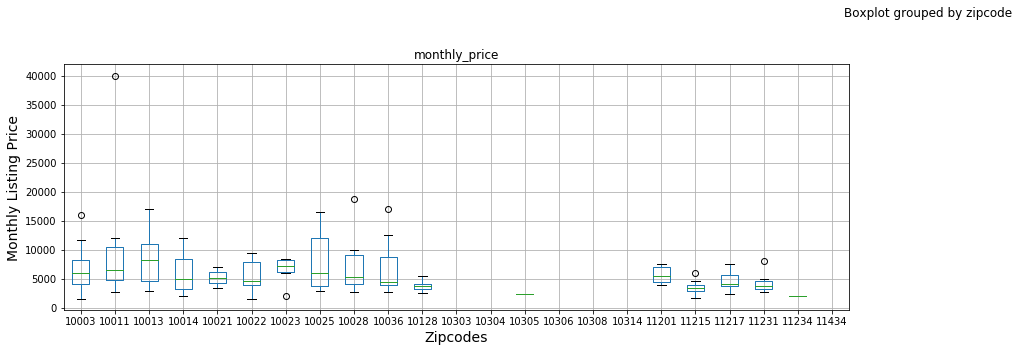

In [267]:
#check for outliers in the weekly and monthly columns
fig_out = plt.figure(figsize=(30,10))
ax1 = fig_out.add_subplot(221)
zillow_bnb.boxplot(column='weekly_price', by='zipcode',ax=ax1)
ax1.set_xlabel("Zipcodes", fontsize = 14)
ax1.set_ylabel("Weekly Listing Price", fontsize = 14)

fig_out = plt.figure(figsize=(30,10))
ax1 = fig_out.add_subplot(221)
zillow_bnb.boxplot(column='monthly_price', by='zipcode',ax=ax1)
ax1.set_xlabel("Zipcodes", fontsize = 14)
ax1.set_ylabel("Monthly Listing Price", fontsize = 14)

### Analyze listings in relation to zip codes

In [268]:
set(zillow_bnb.neighbourhood_group_cleansed)

{'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}

In [269]:
print("The number of unique zipcodes : ",zillow_bnb['zipcode'].nunique())

The number of unique zipcodes :  23


#### We have a total of four unique neighborhoods and 23 zipcodes

Text(0.5, 1.0, 'Frequency of Zipcodes in Boroughs')

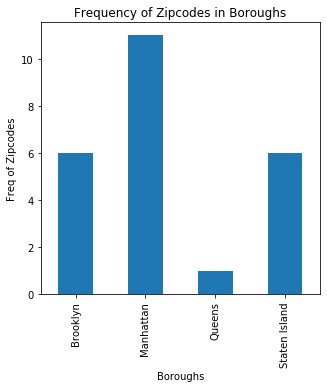

In [270]:
freq = plt.figure(figsize = (5,5))
ax1 = freq.add_subplot(111)
zillow_bnb.groupby("neighbourhood_group_cleansed").agg({'zipcode':'nunique'}).plot(kind='bar', ax=ax1, legend =False)
ax1.set_xlabel('Boroughs')
ax1.set_ylabel('Freq of Zipcodes')
ax1.set_title('Frequency of Zipcodes in Boroughs')

#### Manhattan shows the highest frequencies of zipcodes that have AirBnB listings

In [280]:
color_code = {'Brooklyn': 'red',
         'Manhattan': 'purple',
         'Queens': 'blue',
         'Staten Island': 'green'}

neighborhood_price = zillow_bnb[['neighbourhood_group_cleansed','zipcode','price']]

tag = []

for tag, mark in neighborhood_price.groupby('neighbourhood_group_cleansed'):
    tab.append(go.Box(y = mark.price, name = tag, marker = {'color': color_code[tag]}))

box_fig = go.Layout(height = 1000, width = 750, xaxis = dict(title='Neighborhood'), yaxis = dict(title='Nightly Price'),
                   title = 'Neighborhood Price per Night')
box_chart = go.Figure(data = tab, layout = box_fig)
iplot(box_chart)

#### Manhattan shows the most outliers as well as highest range of prices. This supports the previous findings of majority of zipcodes in Manhattan
#### Brooklyn, Manhattan and Queens have the lowest minimum cost at 50
#### Manhattan has the highest median nighly price at 250

## Finding the Break-Even Period as well as ROI

#### Assume occupancy rate at 75%
#### Annual Revenue = daily price * 365 days * occupancy rate 
#### Break-Even Period = price of property @ 2017-06 / Annual Revenue
#### ROI = Annual Revenue / price of property @ 2017-06

In [ ]:
occupancy_rate = .75
zillow_bnb['Annual_Revenue'] = zillow_bnb.price * 365 * occupancy_rate
zillow_bnb.head()

#### We can use the housing data from 2017-06 as the reference point

In [299]:
# Rename the 2017-06 column to do calculations
zillow_bnb.rename(columns = {'2017-06':'property_cost'},inplace=True)

df_ROI = zillow_bnb.groupby('zipcode').agg({'neighbourhood_group_cleansed':'first',
                                        'property_cost':'mean',
                                        'Annual_Revenue':'mean',
                                           'latitude':'max', 
                                            'longitude':'max'}).reset_index()
df_ROI['Annual_Revenue'] = round(df_ROI.Annual_Revenue,2)
df_ROI['ROI'] = round((df_ROI.Annual_Revenue/df_ROI.property_cost)*100,2)

In [300]:
df_ROI['break_even'] = round((df_ROI.property_cost/df_ROI.Annual_Revenue),2)
df_ROI.sort_values('ROI', inplace=True)
df_ROI

,zipcode,neighbourhood_group_cleansed,property_cost,Annual_Revenue,latitude,longitude,ROI,break_even
10,10128,Manhattan,1787100,55874.12,40.78757,-73.94364,3.13,31.98
2,10013,Manhattan,3316500,108960.21,40.72613,-73.90162,3.29,30.44
6,10023,Manhattan,2142300,74520.23,40.78305,-73.97614,3.48,28.75
8,10028,Manhattan,2083900,74723.61,40.78368,-73.94495,3.59,27.89
3,10014,Manhattan,2491600,89352.00,40.74057,-74.00039,3.59,27.89
4,10021,Manhattan,1815600,72157.28,40.77174,-73.95208,3.97,25.16
0,10003,Manhattan,2147000,91449.09,40.73857,-73.97792,4.26,23.48
17,11201,Brooklyn,1420700,61367.05,40.70430,-73.97756,4.32,23.15
1,10011,Manhattan,2480400,107817.83,40.74918,-73.99414,4.35,23.01
5,10022,Manhattan,2031600,90259.29,40.76436,-73.96056,4.44,22.51


#### Manhattan houses show the lowest ROI and the longest time to break-even
#### Queen, Staten Island, and Brooklym show the highest ROI and the shortest time to break-even

In [327]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent = 'my-application')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of properties using latitude and longitude values
map_zillow_bnb = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_ROI['latitude'], 
                                           df_ROI['longitude'],  
                                           df_ROI['neighbourhood_group_cleansed']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_zillow_bnb)  
    
map_zillow_bnb

In [336]:
map_heat = folium.Map(location=[latitude, longitude], zoom_start=10)

df_ROI['latitude'] = df_ROI['latitude'].astype(float)
df_ROI['longitude'] = df_ROI['longitude'].astype(float)

heat_data = [[row['latitude'],row['longitude']] for index, row in df_ROI.iterrows()]


HeatMap(heat_data).add_to(map_heat)

map_heat

### Here we can see as to why the nightly prices are the way they are
### Manhattan shows the greatest density - can assume due to tourism; can charge higher prices --> property costs are higher

## Conclusion
#### 1. Upon analysis of ROI and break-even periods, the top five choices would be: 11434 (Queens), 10303, 10306, 10304 (Staten Island), and 11234 (Brooklyn).
#### 2. These zip codes are the minority in this dataset and would require additional analyses to validate these findings.
#### 3. The majority of AirBnB rentals are inside Manhattan. This location could be a consideration if the customer is open to long term investments.

## Next Steps/Future Recommendations
#### 1. This analysis focused on two bedroom properties and rental prices. It did not factor other variables that may have a significant effect on rental choices for consumers (e.g. public events, proximity to public transportation or airports, etc.)
#### 2. Understanding consumer behavior to strategically purchase properties is recommended to supplement this quantitative assessment.
#### 3. Analyzing venues nearby each location may provide insight into why consumers choose a certain location.
#### 4. If any of the assumptions made by the customer (e.g. 75% occupancy rate) were to change, we would recommend a separate analysis to provide a better judgement.
#### 5. Lastly, the property prices were from one period in time (2017-06). Analyzing trends over time may support better decision making.